# **Capítulo 4: Perceptrón multicapa**

## Clasificación de dígitos manuscritos usando la base de datos MNIST

Carga de la base de datos MNIST y visualizado de su información

11490434/11490434 [==============================] - 1s 0us/step
Tamaño de los datos de entrenamiento:
 - Imágenes: (60000, 28, 28)
 - Etiquetas: (60000,)
Tamaño de los datos de test:
 - Imágenes: (10000, 28, 28)
 - Etiquetas: (10000,)


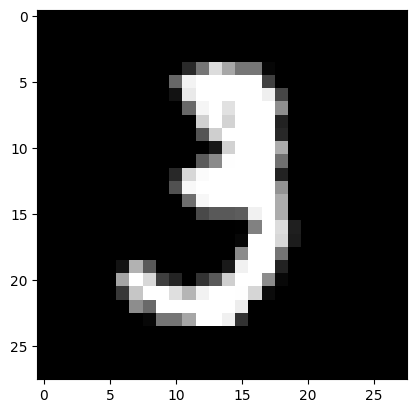

Ejemplo de etiqueta: 3


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data


# Cargamos la base de datos desde el API de Keras
(X_train, Y_train), (X_test, Y_test) = load_data()


# Imprimimos las dimensiones de los datos
print('Tamaño de los datos de entrenamiento:')
print(f' - Imágenes: {X_train.shape}')
print(f' - Etiquetas: {Y_train.shape}')
print('Tamaño de los datos de test:')
print(f' - Imágenes: {X_test.shape}')
print(f' - Etiquetas: {Y_test.shape}')


# Visualización de un ejemplo
id_ejemplo = 10
plt.imshow(X_train[10], cmap='gray')
plt.show()
print(f'Ejemplo de etiqueta: {Y_train[id_ejemplo]}')

Preprocesado de los datos

In [2]:
# Convertimos los datos a punto flotante
# y normalizamos los valores de las imágenes entre 0 y 1
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_train /= 255.
X_test /= 255.


# Redimensionamos las imágenes para que sean un vector de características
# Para esto, pasamos de (N, 28, 28) a un tamaño de (N, 784)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)


# Convertimos las etiquetas categóricas al formato "one-hot"
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)


# Comprobamos la nueva forma de los datos
print('Tamaño de los datos de entrenamiento:')
print(f' - Imágenes: {X_train.shape}')
print(f' - Etiquetas: {Y_train.shape}')
print('Tamaño de los datos de test:')
print(f' - Imágenes: {X_test.shape}')
print(f' - Etiquetas: {Y_test.shape}')


print(f'Ejemplo de etiqueta: {Y_train[id_ejemplo]}')

Tamaño de los datos de entrenamiento:
 - Imágenes: (60000, 784)
 - Etiquetas: (60000, 10)
Tamaño de los datos de test:
 - Imágenes: (10000, 784)
 - Etiquetas: (10000, 10)
Ejemplo de etiqueta: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Definición de la red neuronal

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense


modelo = Sequential()
modelo.add(Input(shape=(784)))
modelo.add(Dense(512, activation='relu'))
modelo.add(Dense(10, activation='softmax'))


print(modelo.summary())

AttributeError: 'NoneType' object has no attribute 'add'

Compilación del modelo y entrenamiento

In [4]:
modelo.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])


historial = modelo.fit(X_train, Y_train,
                       validation_split=0.25,
                       epochs=15,
                       batch_size=32,
                       verbose=1)

Epoch 1/15
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2299 - accuracy: 0.9319 - val_loss: 0.1332 - val_accuracy: 0.9606
Epoch 2/15
1407/1407 [==============================] - 13s 9ms/step - loss: 0.0908 - accuracy: 0.9726 - val_loss: 0.1071 - val_accuracy: 0.9669
Epoch 3/15
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0581 - accuracy: 0.9814 - val_loss: 0.0913 - val_accuracy: 0.9727
Epoch 4/15
1407/1407 [==============================] - 13s 9ms/step - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.0933 - val_accuracy: 0.9732
Epoch 5/15
1407/1407 [==============================] - 13s 10ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0825 - val_accuracy: 0.9777
Epoch 6/15
1407/1407 [==============================] - 20s 14ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0936 - val_accuracy: 0.9747
Epoch 7/15
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0168 - accuracy: 0.9943 - val_loss: 0.1011 - va

Visualizado de la gráfica de la tasa de acierto en entrenamiento con respecto a la obtenida en validación

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


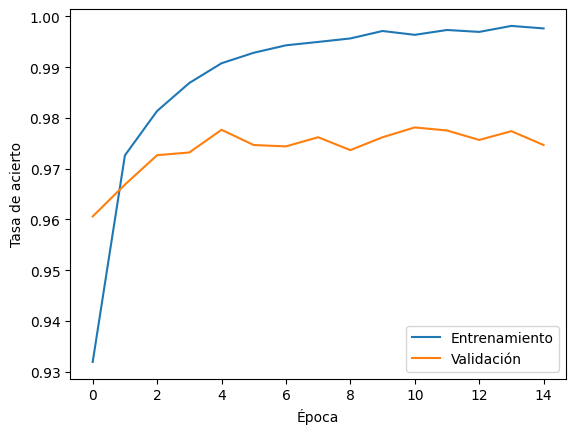

In [5]:
# Imprimimos las claves del diccionario
print(historial.history.keys())


# Generamos una gráfica con la precisión en entrenamiento y validación
plt.plot(historial.history['accuracy'])
plt.plot(historial.history['val_accuracy'])
plt.xlabel('Época')
plt.ylabel('Tasa de acierto')
plt.legend(['Entrenamiento', 'Validación'])
plt.show()

Predicción del conjunto de test con el modelo entrenado

In [6]:
print(np.argmax(modelo.predict(X_test), axis=-1))
loss, accuracy = modelo.evaluate(X_test, Y_test, verbose=1)
print('Precisión sobre test: {:.2f}%'.format(100*accuracy))

313/313 [==============================] - 1s 3ms/step
[7 2 1 ... 4 5 6]
313/313 [==============================] - 1s 3ms/step - loss: 0.1218 - accuracy: 0.9767
Precisión sobre test: 97.67%


Guardado del modelo

In [7]:
modelo.save('modelo_cap_4.h5')

Carga del modelo ya entrenado

In [8]:
from tensorflow.keras.models import load_model


nuevo_modelo = load_model('modelo_cap_4.h5')
print(nuevo_modelo.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


Comprobación de la precisión del modelo guardado sobre el conjunto de test

In [9]:
loss, accuracy = nuevo_modelo.evaluate(X_test, Y_test, verbose=0)
print('Precisión sobre test: {:.2f}%'.format(100*accuracy))

Precisión sobre test: 97.67%
